
<img src="MissionLogo.png">

# Intro to Working with ICESat-2 Data
This notebook is aimed to help people get started looking at ICESat-2 data, and be a compilation of learning resources from scientists working with this dataset. If you have never heard of ICESat-2, this is a great place to start!

The majority of learning resources featured in notebook come from the 2020 ICESat-2 Cryospheric Hackweek


2020 Hackweek GitHub: https://github.com/ICESAT-2HackWeek/



## ICESat-2 Mission: Satellite, Sensor, and Data
There's a lot of information out there about this mission, and a quick google search of ICESat-2 will bring you a lot of information! However, a quick overview to get you primed for this notebook: 

### The Basics:
The Ice, Cloud, and land Elevation Satellite-2, or ICESat-2, is measuring the height of a changing Earth one laser pulse at a time, 10,000 laser pulses per second. It was launched in September of 2018.

Some ICESat-2 websites to familiarize yourself with: 
- [NSIDC](https://nsidc.org/data/icesat-2 )
- [NASA](https://icesat-2.gsfc.nasa.gov/)


#### Hackweek Tutorial (~1hr) : https://www.youtube.com/watch?v=0guml7ihfdA 

# Common Tools

Most people working with this data will use these basic tools to organize code, analyze, etc.:
- Python 
- GitHub 
- Jupyter Notebook 
- EarthData Login 
- Icepyx
- CapToolkit


## Python 
Python is an interpreted, high-level, general-purpose programming language. It is the most commonly used language for looking at this kind of data, and the tools used to help with acessing/analyze data (captoolkit/icepyx) are written in python. It is also reccomended to use Anaconda, which is the recommended Python distribution, for installing and working with Python on your local computer. Conda is an open source package and environment management system for installing multiple versions of software packages, their dependencies and switching easily between them. While you can set up python without anaconda, conda makes it easier to install packages such as numpy, pandas, geopandas and other tools used in data analysis. 

-Install Anaconda: https://www.anaconda.com/products/individual


## GitHub/Git
Git is a popular version control system that is the foundation of most open source software development. GitHub is a hosting service for Git repositories, enabling us to share code across teams in a web environment. Once set-up, it's a good idea to ask your team if they have a __GitHub Organization__ that they will work from. 

- Make a GitHub Account: https://github.com/ 

- Install Git: https://git-scm.com/

#### Learning Resources: 

- [Git/GitHub Crash Course for beginners](https://www.youtube.com/watch?v=SWYqp7iY_Tc)

- [HackweekGit/GitHub Tutorial (~1.5hrs)](https://www.youtube.com/watch?v=O2lLC_s_d20&feature=youtu.be)  

## Jupyter Notebook
The IPython Notebook is an interactive computing environment that enables users to author notebook documents that can contain live code, plots, widgets, etc. To install jupyter notebooks, or jupyter lab:
- Install Jupyter Notebook/Lab: (https://jupyter.org/install) 

#### Learning Resoruces: 
- [Practical Introduction to Jupyter Notebooks](https://github.com/ICESAT-2HackWeek/intro-jupyter-git/blob/master/01-Intro%20Jupyter%20Notebook.ipynb) 
- [Beyond Plain Python](https://github.com/ICESAT-2HackWeek/intro-jupyter-git/blob/master/02-Beyond%20Plain%20Python.ipynb)


## Earth Data
Earth Data gives you online access to hundreds of different earth observation data collections, including ICESat-2.

Make an account here: https://urs.earthdata.nasa.gov/users/new 

#### Learning Resources: 
- [Getting Started with Earth Data](https://earthdata.nasa.gov/learn/getting-started) 
- [Data Proccessing Levels](https://earthdata.nasa.gov/collaborate/open-data-services-and-software/data-information-policy/data-levels) 

## Icepyx
A collection of python tools for obtaining and working with ICESat-2 data. It works within the community to build a library of shared resources that help to simplify the process of querying, obtaining, analyzing, and manipulating ICESat-2 datasets to enable scientific discovery.
- Install Icepyx: https://github.com/icesat2py/icepyx

#### Learning Resources: 
- To see example notebooks, on icepyx repository above go to 'doc/examples'. 

## CapToolkit
Set of tools for processing and integrating satellite and airborne (radar and laser) altimetry data.
- Install CapToolkit: https://github.com/fspaolo/captoolkit

#### Learning Resources:
- To see example notebooks, scroll down on README to "notebooks" on Captoolkit repository. 

## Acessing Data
This notebook aims to give a very simple look at acessing data, just an example to get you started! 
There are so many great in depth resources that will help you discover how to best do this, including subsetting:
- [01- Data Resources](https://github.com/ICESAT-2HackWeek/data-access/blob/master/notebooks/01-Data_Resources_Intro.ipynb)
- [02- Data Acecess](https://github.com/ICESAT-2HackWeek/data-access/blob/master/notebooks/02-Data_Access.ipynb)
- [03- Subsetting](https://github.com/ICESAT-2HackWeek/data-access/blob/master/notebooks/03-Data_Access2_Subsetting.ipynb )


In the meantime, to access + download new data you must first have a Earth Data login! 

In [2]:
#Some of the libraries we need to import
from icepyx import icesat2data as ipd
import os
import shutil
from pprint import pprint

# utility modules
import glob
import sys
import re

# the usual suspects:
import numpy as np
import matplotlib.pyplot as plt

# specialty modules
import h5py
import pyproj
%matplotlib inline

#Some setup code
path = './download'

In [3]:
#First, we need to define where we want to look:
# Pine Island Glacier
short_name = 'ATL06'                        #The data product, as described in data products chart 
spatial_extent = [-102, -76, -98, -74.5]    #Bounding box given in decimal degrees: lower left longitude, 
                                            #lower left latitude, upper right longitude, and upper right latitude.
date_range = ['2019-01-01','2019-03-25']    #Finally, our date range we want to look at 


region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range) #Here we create a region object

earthdata_uid = 'yourearthdatausername'       #INPUT USERNAME HERE
email = 'yourearthdataemail@gmail.com'        #INPUT EMAIL HERE
region_a.earthdata_login(earthdata_uid, email)


Earthdata Login password: ········
['Invalid username or password, please retry.']
Please re-enter your Earthdata user ID: annavalentine
Earthdata Login password: ········


In [4]:
# And now we are going to download our "granules", these will end up in your ./downloads path
region_a.download_granules(path)

#This may take a while! 

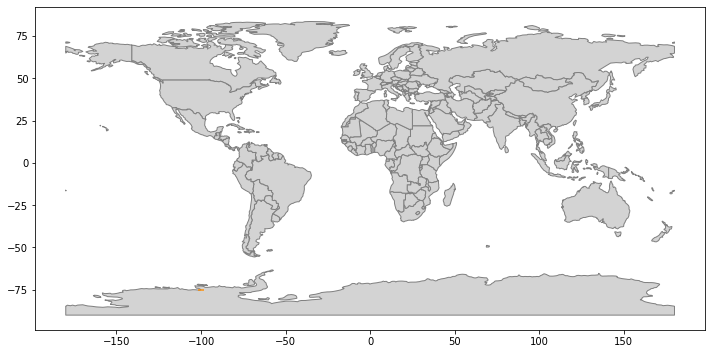

In [5]:
#Okay, but what am I even looking at? Let's use a tool from the icepyx library that easily allows us to see the spacial 
#extent of what we are looking at. Check out the lower left of map in orange!
region_a.visualize_spatial_extent() 

## What is in the file I downloaded? 
So now we have some data downloaded, and it's always a good idea to take a look at what is in the files before trying any analysis. There are a few different ways to do so, you can look at the full product data dictionary on the NSIDC's website, or we can explore the file in python!

For exploration, here's a link to [ATL06's full data dictionary](https://nsidc.org/sites/nsidc.org/files/technical-references/ICESat2_ATL06_data_dict_v003.pdf). 
 


In [6]:
#To see a quick summary of the data downloaded (icepyx tool):
region_a.dataset_summary_info()


dataset_id :  ATLAS/ICESat-2 L3A Land Ice Height V003
short_name :  ATL06
version_id :  003
time_start :  2018-10-14T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL06) provides geolocated, land-ice surface heights (above the WGS 84 ellipsoid, ITRF2014 reference frame), plus ancillary parameters that can be used to interpret and assess the quality of the height estimates. The data were acquired by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory.
orbit_parameters :  {'swath_width': '36.0', 'period': '94.29', 'inclination_angle': '92.0', 'number_of_orbits': '0.071428571', 'start_circular_latitude': '0.0'}


In [8]:
#To see all of the different variables availible to us (icepyx tool):
region_a.order_vars.avail()

['ancillary_data/atlas_sdp_gps_epoch',
 'ancillary_data/control',
 'ancillary_data/data_end_utc',
 'ancillary_data/data_start_utc',
 'ancillary_data/end_cycle',
 'ancillary_data/end_delta_time',
 'ancillary_data/end_geoseg',
 'ancillary_data/end_gpssow',
 'ancillary_data/end_gpsweek',
 'ancillary_data/end_orbit',
 'ancillary_data/end_region',
 'ancillary_data/end_rgt',
 'ancillary_data/granule_end_utc',
 'ancillary_data/granule_start_utc',
 'ancillary_data/qa_at_interval',
 'ancillary_data/release',
 'ancillary_data/start_cycle',
 'ancillary_data/start_delta_time',
 'ancillary_data/start_geoseg',
 'ancillary_data/start_gpssow',
 'ancillary_data/start_gpsweek',
 'ancillary_data/start_orbit',
 'ancillary_data/start_region',
 'ancillary_data/start_rgt',
 'ancillary_data/version',
 'ancillary_data/land_ice/dt_hist',
 'ancillary_data/land_ice/fit_maxiter',
 'ancillary_data/land_ice/fpb_maxiter',
 'ancillary_data/land_ice/maxiter',
 'ancillary_data/land_ice/max_res_ids',
 'ancillary_data/lan

## HDF5
The data downloaded is in a H5 file, H5 files are optimized for numerical data, and are a common file format for a variety of applications. many people in the ICESat-2 community have created "readers" for atl06 data (as well as other products). These readers help pick apart the files into meanigful variables such as latitude, longitude, and elevation.

Some helpful jupyter notebooks written by Fernando Paolo for reading HDF5:
- [Intro HDF5](https://github.com/ICESAT-2HackWeek/intro-hdf5/blob/master/notebooks/intro-hdf5.ipynb)
- [Reducing IS2 Files](https://github.com/ICESAT-2HackWeek/intro-hdf5/blob/master/notebooks/intro-is2-files.ipynb)

#### Below, we are going to utilize a ATL06 reader from Ben Smith: 

In [9]:
#ATL06 Reader:
def atl06_to_dict(filename, beam, field_dict=None, index=None, epsg=None):
    """
        Read selected datasets from an ATL06 file

        Input arguments:
            filename: ATl06 file to read
            beam: a string specifying which beam is to be read (ex: gt1l, gt1r, gt2l, etc)
            field_dict: A dictinary describing the fields to be read
                    keys give the group names to be read, 
                    entries are lists of datasets within the groups
            index: which entries in each field to read
            epsg: an EPSG code specifying a projection (see www.epsg.org).  Good choices are:
                for Greenland, 3413 (polar stereographic projection, with Greenland along the Y axis)
                for Antarctica, 3031 (polar stereographic projection, centered on the Pouth Pole)
        Output argument:
            D6: dictionary containing ATL06 data.  Each dataset in 
                dataset_dict has its own entry in D6.  Each dataset 
                in D6 contains a numpy array containing the 
                data
    """
    if field_dict is None:
        field_dict={None:['latitude','longitude','h_li', 'atl06_quality_summary'],\
                    'ground_track':['x_atc','y_atc'],\
                    'fit_statistics':['dh_fit_dx', 'dh_fit_dy']}
    D={}
    file_re=re.compile('ATL06_(?P<date>\d+)_(?P<rgt>\d\d\d\d)(?P<cycle>\d\d)(?P<region>\d\d)_(?P<release>\d\d\d)_(?P<version>\d\d).h5')
    with h5py.File(filename,'r') as h5f:
        for key in field_dict:
            for ds in field_dict[key]:
                if key is not None:
                    ds_name=beam+'/land_ice_segments/'+key+'/'+ds
                else:
                    ds_name=beam+'/land_ice_segments/'+ds
                if index is not None:
                    D[ds]=np.array(h5f[ds_name][index])
                else:
                    D[ds]=np.array(h5f[ds_name])
                if '_FillValue' in h5f[ds_name].attrs:
                    bad_vals=D[ds]==h5f[ds_name].attrs['_FillValue']
                    D[ds]=D[ds].astype(float)
                    D[ds][bad_vals]=np.NaN
    if epsg is not None:
        xy=np.array(pyproj.proj.Proj(epsg)(D['longitude'], D['latitude']))
        D['x']=xy[0,:].reshape(D['latitude'].shape)
        D['y']=xy[1,:].reshape(D['latitude'].shape)
    temp=file_re.search(filename)
    D['rgt']=int(temp['rgt'])
    D['cycle']=int(temp['cycle'])
    D['beam']=beam
    return D

## Quick Visualizations of Data
A quick look plotting elevation, latitude and longitude.

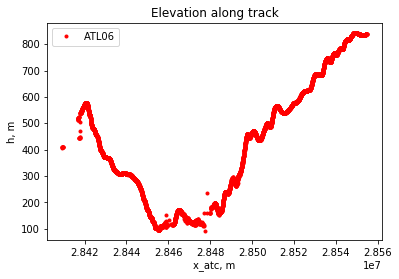

In [10]:
path = './download/*.h5'

ATL06_files = glob.glob(path)  #Gather all of our files from the folder 

#Let's look at just one file first
D6 = atl06_to_dict(ATL06_files[1],'/gt1l', index=None, epsg=3031) #we specify the file, beam, and projection (ESPG)

# We are going to plot the along track coordinates (x_atc) and elevations (H_li)! 
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(D6['x_atc'], D6['h_li'],'r.', label='ATL06')
ax.set_title("Elevation along track")
ax.set_xlabel('x_atc, m')
ax.set_ylabel('h, m')
ax.legend();

## Crossovers 
ICESat-2's orbit is tailored to cross over often near the poles, making it easier to look at elevation change over time. If repeat track is around 90 days, but cross overs happen about every 21 days, elevation change can be derived at higher temporal resolution by using the crossovers. 

Crossover Tools/Learning Resources:
- [Gridding and Filtering of Elevation Change Observations](https://nbviewer.jupyter.org/github/fspaolo/captoolkit/blob/master/notebooks/Gridding-rendered.ipynb)
- [CapToolKit](https://github.com/fspaolo/captoolkit) 
- xover.py



Error on file: ./download\processed_ATL06_20190124043557_04080210_003_01.h5


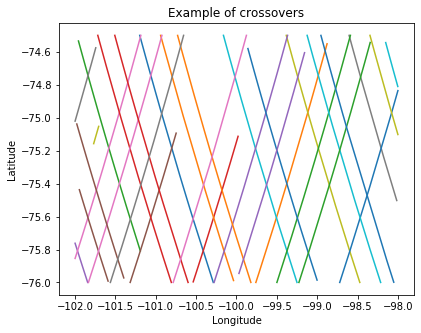

In [11]:
#Okay, how about if we look at multiple files at once, by plotting just long and lat, we can see their crossovers!
from mpl_toolkits.basemap import Basemap 

# m=Basemap(projection='spstere',
#           ellps='WGS84', lon_0 = -100, boundinglat=-70)
# m.drawcoastlines()

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)


for fname in ATL06_files:
    
    try: 
        
        
        D7 = atl06_to_dict(fname,'/gt2l', index=None, epsg=3031)  #Run the ATL06 reader on all files in path

        lat, lon = D7['latitude'], D7['longitude']    
        
        ax1.plot(lon, lat) #Plot long/lat
        
        '''NOTE: The ATL06 reader we use automatically transforms the coordinates into ESPG 3031, polar stereographic.
        Some ATL06 readers do not do this.  '''
    
    
    except: 
        print("Error on file:", fname) #Sometimes, files don't download correctly
        
   
ax1.set_title("Example of crossovers")    
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
plt.show();


## Next Steps in Learning: 
Exploring different jupyter notebooks, creating your own and working with data is a great way to get started. There are lots of resources out there to help and the scientists of this community want to help! 

Hackweek GitHub: https://github.com/ICESAT-2HackWeek/ 

Hackweek webpage: https://icesat-2hackweek.github.io/ 


### Authors
- Anna Valentine (annavalentine@mymail.mines.edu)
- Countless code contributors from 2020 Hackweek

#### Note: 
This notebook was created during the 2020 Cryospheric Hackweek and uses code from multiple contributors during the hackweek. Huge thanks goes out to everyone involved, especially the fantastic admin and tutorial leads!
